# **K- Nearest Neighbor:**

A supervised ML algorithm used for both classifiation and regression purpose.
KNN algorithm is one of the simplest classification algorithm and it is one of the most used learning algorithms.KNN is 

>a non-parametric (it does not make any assumptions on the underlying data distribution) algorithm.

> Instance based and lazy learning algorithm (it does not use the training data points to do any generalization. It does not try to learn any function from training data. In other words, there is no explicit training phase or it is very minimal.Lack of generalization means that KNN keeps all the training data or memorizes the training data pattern, which is needed during the testing phase)

>Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

**Applications:**


1.   Predict cancer is malignant or benign.
2.   Pattern recognition.
3.   Recommender systems.
4.   Computer Vision.
5.   Gene Expression.
6.   Concept Searching etc. 

**Disadvantage:**

1. Not efficient on big data.
2. Susceptible to overfitting and curse of dimensionality.
3. As data increases, KNN operation becomes slow.

**Steps to follow:**

1. choose the number of k.
2. select a distance metric.
3. find the k nearest neighbor of samples.
4. Assign the class label by majority vote.




In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [4]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df['species'] = df['species'].map({'setosa':0,
                                   'versicolor':1,
                                   'virginica':2})
y = df['species']

In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [7]:
x = df[['petal_length','petal_width']]
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
type(x)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
x.isnull().sum()

petal_length    0
petal_width     0
dtype: int64

In [11]:
df['species'].isnull().sum()

0

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=50)

In [14]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

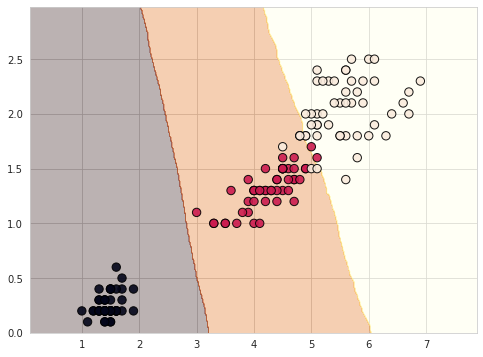

In [15]:
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize = (8,6))

ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 70, alpha = 0.9,edgecolors = 'k')

## **Distance Metrics:**

*  *Metrics intended for Real Valued vector spaces*

1.   EuclideanDistance : $ \sqrt{\sum (x - y)^{2}} $

2.   ManhattanDistance : $ \sum \left | x-y \right |$

3.   ChebyshevDistance : $max\left | x-y \right |$

4. MinkowskiDistance   : $\sum \left ( \left | x-y \right |^{p} \right )^{\frac{1}{p}}$
5. WMinkowskiDistance   : $\sum \left ( w\left | x-y \right |^{p} \right )^{\frac{1}{p}}$
6. SEuclideanDistance : $\sqrt{\sum {\frac{(x - y)^{2}}{V}}}$

**Other Distance metrics (google search):**

* *Metrics intended for integer Valued vector spaces*
* *Metrics intended for 2 dimentional vector spaces*
* *Metrics intended for Boolean Valued vector spaces*
* User defined distance






### **Imp Distance Metrics Descriptions:**

**1. EuclideanDistance: marks the Shortest Root**

* Squared root of the sum of the squared difference between the element of 2 vectors or 2 points.
* It is L2 norm of 2 vectors. 
* It is one of the minimum and direct distance between any 2 points.

**2. ManhattanDistance: marks the Longest Root**

*(resembling the directions of a taxi moving in a city)*

* Sum of the absolute difference between the element of 2 vectors or 2 points.
* It is L2 norm of 2 vectors. 
* It is the distance along the axis of right angle.

**3. ChebyshevDistance :** *(how a king move in a game of chess)*

* Maximum of the absolute difference between the element of 2 vectors or 2 points.
* When you have many dimensions to consider and most of them are redundant then you just pick the one whose absolute difference is maximum.